In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import sqlite3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = sqlite3.connect('/content/drive/My Drive/data/checking-logs.sqlite.sqlite')

In [4]:
commits = pd.io.sql.read_sql(
    "select timestamp from checker where uid like 'user_%'",
    data, parse_dates=['timestamp']
    )

In [5]:
commits['date'] = commits['timestamp'].dt.floor('d')
commits['time'] = pd.to_datetime(commits['timestamp'].dt.time.astype(str),
                                 format='%H:%M:%S.%f')
commits = commits.drop('timestamp', axis=1)

In [6]:
commits['daytime'] = pd.cut(
    commits.time, [pd.to_datetime(
        h, unit='h', origin=pd.Timestamp('1900-01-01')
        ) for h in [0, 4, 10, 17, 24]], right=False,
    labels=['night', 'morning', 'afternoon', 'evening'], include_lowest=True)

In [7]:
df = commits.groupby('daytime').date.value_counts().unstack(0)

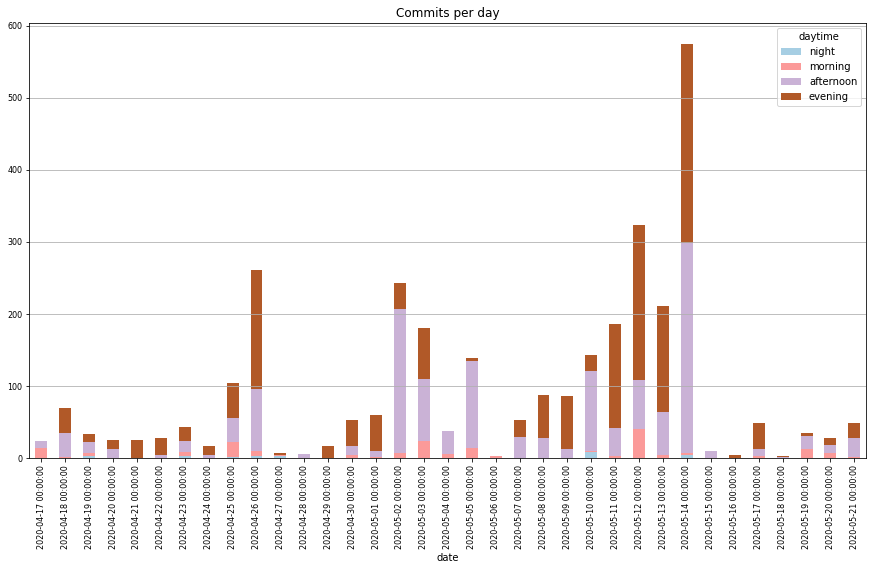

In [10]:
graph = df.plot.bar(stacked=True, figsize=(15, 8), title='Commits per day',
                 rot=90, fontsize=8, colormap='Paired')
graph.grid(axis='y')